In [2]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras 
import seaborn as sns

In [3]:
print(tf.__version__)

2.3.0


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [6]:
print(len(x_train))

60000


In [7]:
print(len(x_test))

10000


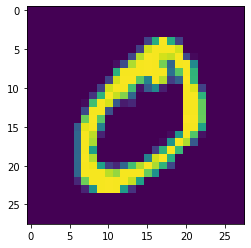

In [8]:
plt.imshow(x_train[1])

In [9]:
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)


In [10]:
#Flatten/reshape x_train and x_test into 1D 
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

In [11]:
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)

x_train shape:  (60000, 784)
x_test shape:  (10000, 784)


In [12]:
#Feature Scaling 
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [13]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
#Initializing our model
model = tf.keras.models.Sequential()

In [15]:
#Adding The hiddden Layer
model.add(tf.keras.layers.Dense(100 ,
                                input_shape=(784,),
                                activation = 'relu'))

In [16]:
#Adding the output layer
model.add(tf.keras.layers.Dense(10,
                              activation = 'sigmoid'))

In [17]:
#Compiling the model
model.compile(optimizer='adam',
                       loss = 'sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [18]:
#Fitting our model
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2422 - accuracy: 0.9308
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1032 - accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0715 - accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0554 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0451 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0322 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0284 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0225 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [19]:
#Make Predictions On The Test Set 
y_pred = model.predict(x_test)
y_pred[1]

array([6.6348080e-16, 1.6486642e-12, 9.9931175e-01, 3.0392914e-14,
       2.1223420e-33, 2.9763375e-17, 3.7043322e-20, 1.1823485e-24,
       1.1491799e-17, 2.9070685e-25], dtype=float32)

In [20]:
np.argmax(y_pred[2])

1

In [21]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [22]:
cfm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cfm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    0,    0,    1,    1,    3,    1,    1,    1],
       [   0, 1118,    3,    3,    1,    0,    2,    2,    5,    1],
       [   6,    1,  996,    2,    1,    0,    3,   12,   11,    0],
       [   0,    0,    8,  988,    1,    4,    2,    5,    2,    0],
       [   1,    1,    9,    1,  935,    2,    8,    6,    3,   16],
       [   5,    2,    1,   14,    3,  846,    3,    6,   10,    2],
       [   5,    3,    3,    1,    5,    6,  930,    0,    5,    0],
       [   1,    5,    9,    2,    2,    0,    0,  992,    2,   15],
       [   4,    1,    5,    6,    6,    1,    2,    7,  938,    4],
       [   3,    2,    0,    5,   10,    2,    0,    8,    5,  974]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual values')

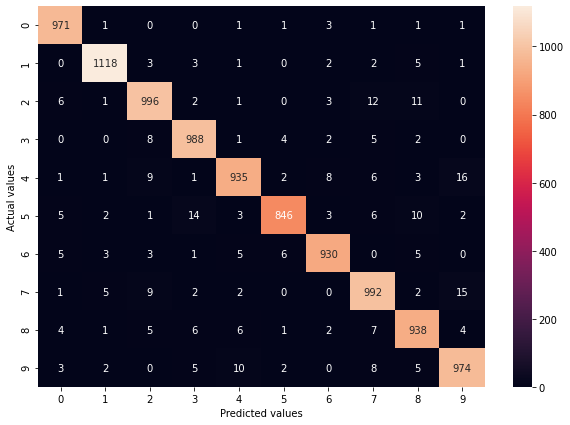

In [23]:
#Visualization
plt.figure(figsize = (10,7))
sns.heatmap(cfm, annot=True, fmt="d")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')